<a href="https://colab.research.google.com/github/busung/machine-learning-practice/blob/main/5_%EB%B6%84%EB%A5%98%EC%99%80_SGD(%EC%86%8C%EC%9B%A8%EC%9C%B5_5%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류

## 데이터 준비

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [12]:
fish_input = fish.drop("Species",axis=1).to_numpy()

In [13]:
fish_target = fish['Species'].to_numpy()

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(fish_input,fish_target)

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

## KNN Classifiers의 확률 예측
* 다소 정확도가 떨어지는 것을 확인 할 수 있음(이웃의 영향을 너무 많이 받음)
* 새로운 알고리즘이 필요

In [24]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,y_train)

print(kn.score(train_scaled,y_train))
print(kn.score(test_scaled,y_test))

0.8907563025210085
0.775


In [25]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [26]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Bream' 'Perch' 'Bream' 'Bream']


In [27]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4))

[[0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.     0.3333 0.     0.3333]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]]


## 로지스틱 회귀
* 이진 분류 모델
* Sigmoid를 이용하여 선형 회귀 모델의 범위의 값을 0~1로 만들어 줌

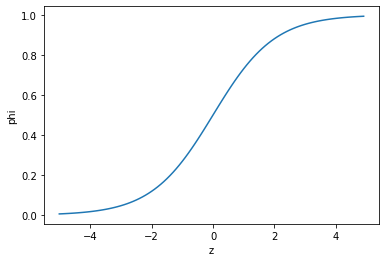

In [28]:
#Sigmoid function
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [33]:
bream_smelt_indexes = (fish_target == 'Bream') | (fish_target == 'Smelt')#Bream과 Smelt만 뽑기 위한 Pandas 기법
input_bream_smelt = fish_input[bream_smelt_indexes]
target_bream_smelt = fish_target[bream_smelt_indexes]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_bream_smelt,target_bream_smelt)

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,y_train)

LogisticRegression()

In [37]:
print(lr.predict(train_scaled[:5]))

['Smelt' 'Bream' 'Bream' 'Bream' 'Bream']


In [39]:
print(lr.predict_proba(train_scaled[:5]))

[[0.03682161 0.96317839]
 [0.98132992 0.01867008]
 [0.98017842 0.01982158]
 [0.99315071 0.00684929]
 [0.9754243  0.0245757 ]]


In [41]:
print(lr.classes_)

['Bream' 'Smelt']


In [40]:
#선형 회귀 계수
print(lr.coef_,lr.intercept_)

[[-0.59471876 -0.79726828 -0.82466471 -0.86072642 -0.83486508]] [-2.04822598]


In [43]:
#선형 회귀 값
decisions = lr.decision_function(train_scaled[:5])
print(decisions)

[ 3.2641537  -3.96198642 -3.9009632  -4.97673685 -3.68111421]


In [45]:
#위의 회귀 값을 exp해준 것
from scipy.special import expit
print(expit(decisions))
#0.5보다 높은 첫 번째값은 Smelt로 나머지는 Bream으로 분류  되는 것을 확인 할 수 있다.
#predict_proba의 확률과도 값이 같은 것을 확인 할 수 있다.

[0.96317839 0.01867008 0.01982158 0.00684929 0.0245757 ]


## 로지스틱 회귀의 다중 분류
*  Ridge를 기반으로 규제를 적용
* sklearn에서 다중 분류 시 자동으로 Softmax함수를 사용해 줌

In [51]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [52]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [53]:
fish_input = fish.drop("Species",axis=1).to_numpy()

In [54]:
fish_target = fish['Species'].to_numpy()

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(fish_input,fish_target)

In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

In [57]:
lr = LogisticRegression(C=20, max_iter=1000)#C는 Ridge에 관한 값,C가 클 수록 규제는 작아진다
lr.fit(train_scaled, y_train)
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.9243697478991597
0.9


In [58]:
print(lr.predict(test_scaled[:5]))

['Bream' 'Perch' 'Perch' 'Perch' 'Pike']


In [59]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.97  0.023 0.    0.    0.001 0.    0.007]
 [0.    0.005 0.759 0.001 0.225 0.002 0.008]
 [0.001 0.037 0.649 0.001 0.292 0.001 0.018]
 [0.    0.005 0.781 0.001 0.203 0.002 0.008]
 [0.    0.    0.085 0.775 0.098 0.042 0.   ]]


In [60]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [61]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [62]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[  8.84   5.08  -1.    -2.66   1.85 -15.99   3.89]
 [ -4.52  -0.37   4.62  -1.96   3.4   -1.23   0.07]
 [ -3.05   0.94   3.81  -2.48   3.01  -2.48   0.24]
 [ -4.39  -0.34   4.66  -1.87   3.32  -1.39   0.02]
 [ -3.91  -5.18   2.64   4.85   2.78   1.94  -3.11]]


### Softmax
* 다중 분류에 사용하는 함수

In [63]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.97  0.023 0.    0.    0.001 0.    0.007]
 [0.    0.005 0.759 0.001 0.225 0.002 0.008]
 [0.001 0.037 0.649 0.001 0.292 0.001 0.018]
 [0.    0.005 0.781 0.001 0.203 0.002 0.008]
 [0.    0.    0.085 0.775 0.098 0.042 0.   ]]


# 확률적 경사 하강법(SGD)
* 점진적 학습 모델(데이터가 주어질 때 마다 모델을 학습하는 것)
* 이런 모델을 학습 시킬 때 사용하는 것이 바로 경사 하강법
* 손실 함수가 최저가 되도록 하는데 이 최저점을 찾는 방법(=미분값이 0)
1. 배치 경사 하강법
  * 전체 Data를 다 이용하여 학습
  * 가장 강력하지만 학습 속도가 느림
2. 미니 배치 경사 하강법
  * 학습 시 Data의 일부만 사용하여 학습 하는 것
  * 전체 Data를 다 이용하면 1epoch
  * 이 때 학습 시 Data의 수를 정하는 최적화가 필요함
3. 확률적 경사 하강법
 * 학습 시 한 개의 데이터를 랜덤으로 뽑아 사용하는 것
 * 전체 Data를 다 이용하면 1epoch
 * 학습 속도가 매우 빠름

In [65]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [66]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [67]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target)

In [68]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [70]:
from sklearn.linear_model import SGDClassifier

In [71]:
sc = SGDClassifier(loss='log',max_iter=100)#손실 함수가 로지스틱
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8235294117647058
0.825


In [74]:
sc.partial_fit(train_scaled,train_target)#학습한 내용을 점진적으로 더 학습시킴
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8403361344537815
0.75


## 에포크와 Overfitting
* 에포크가 너무 작다
  * Underfitting이 발생
* 에포크가 너무 크다
  * Overfitting이 발생
  * Train accuracy는 증가하는데 Test accuracy는 감소하는 상황

In [76]:
import numpy as np
sc = SGDClassifier(loss='log')
train_score = []
test_score = []
classes = np.unique(train_target)

In [77]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)  
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

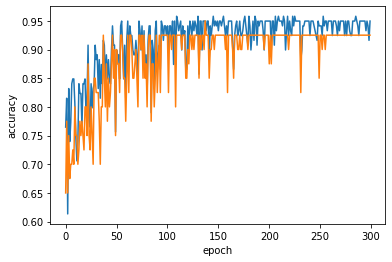

In [78]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [79]:
sc = SGDClassifier(loss='log', max_iter=100)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9243697478991597
0.925


In [80]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None)#tol:일정 에포크 동안 성능이 향상되지 않으면 학습을 멈춤,None이면 지정한 epoch를 다 수행
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9327731092436975
0.925
